In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scripts import load, utils

In [4]:
## helper function to estimate systematic errors by loading multiple extrapolations
def load_many_extrap(what, **kwargs):
    from copy import deepcopy
    all_extraps = []
    all_extraps.append(utils.Extrapolation('variance', deg=2, num_points=6))
    all_extraps.append(utils.Extrapolation('truncation', deg=2, num_points=6))
    all_extraps.append(utils.Extrapolation('bonddim', deg=2, num_points=6))
    
    extraps_raw = []
    for bond_dim in all_extraps:
        parms = deepcopy(kwargs)
        parms['bond_dim'] = bond_dim
        d, props = load.result(what, **parms)
        extraps_raw.append(d)
    
    extraps = np.column_stack([er[:,1] for er in extraps_raw])
    dd = np.empty((extraps.shape[0], 4))
    dd[:,0] = extraps_raw[0][:,0]
    dd[:,1] = np.mean(extraps[:,0:], axis=1)
    dd[:,2] = np.min(extraps[:,0:], axis=1)
    dd[:,3] = np.max(extraps[:,0:], axis=1)
    return dd, props

## Fig. 2 : Effect of averaging

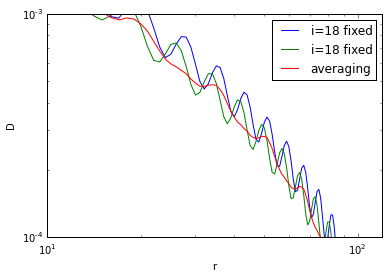

In [5]:
L = 128
filling = 0.875
bond_dim = 4800

corr_types = []
corr_types.append( ('i=18 fixed', utils.FixedStart(18)) )
corr_types.append( ('i=18 fixed', utils.FixedStart(20)) )
corr_types.append( ('averaging', utils.Averaged()) )


figure()
for lab, ct in corr_types:
    d, props = load.result('pairfield', L=L, filling=filling, bond_dim=bond_dim, correlation_type=ct)
    plot(d[:,0], d[:,1], label=lab)
xlim(10, 120)
ylim(1e-4, 1e-3)
legend(loc='best')
xscale('log')
yscale('log')
xlabel('r')
ylabel('D')

## Fig. 4a : Effect of bond dimension $M$

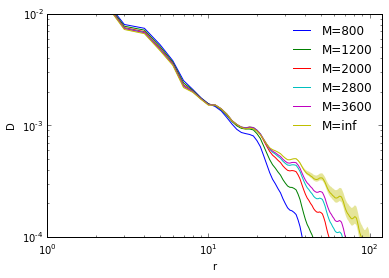

In [6]:
L = 128
filling = 0.875
corr_type = utils.Averaged()

bond_dims = []
bond_dims.append(800)
bond_dims.append(1200)
bond_dims.append(2000)
bond_dims.append(2800)
bond_dims.append(3600)

figure()
for bond_dim in bond_dims:
    d, props = load.result('pairfield', L=L, filling=filling, bond_dim=bond_dim, correlation_type=corr_type)
    plot(d[:,0], d[:,1], label='M='+str(bond_dim))

d, props = load_many_extrap('pairfield', L=L, filling=filling, correlation_type=corr_type)
line, = plot(d[:,0], d[:,1], label='M=inf')
fill_between(d[:,0], d[:,2], d[:,3], edgecolor='none', facecolor=line.get_color(), alpha=.4)

xlim(1, 120)
ylim(1e-4, 1e-2)
legend(loc='best', frameon=False)
xscale('log')
yscale('log')
xlabel('r')
ylabel('D')

## Fig. 6c) : Extrapolation of pair correlation

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.


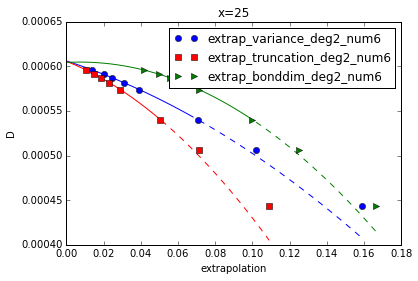

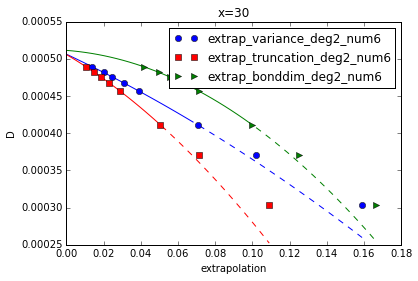

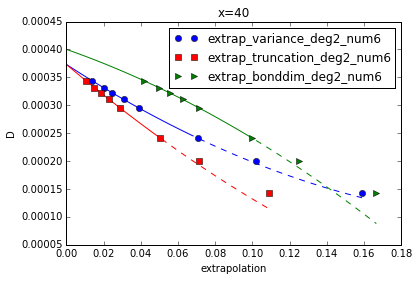

In [7]:
L = 128
filling = 0.875
corr_type = utils.Averaged()

all_extraps = []
all_extraps.append((1., utils.Extrapolation('variance', deg=2, num_points=6)))
all_extraps.append((1e4, utils.Extrapolation('truncation', deg=2, num_points=6)))
all_extraps.append((200, utils.Extrapolation('bonddim', deg=2, num_points=6)))

markers = 'os>v*'
colors  = 'brgk' 

for at_x in [25,30,40]:
    figure()
    for i,(scale_factor,bond_dim) in enumerate(all_extraps):
        d, props = load.extrapolation('pairfield', L=L, filling=filling, bond_dim=bond_dim, at_x=at_x, correlation_type=corr_type)

        fit_coeff = props['fitted_coeff']
        xfit = linspace(0,max(d[:,0]))
        yfit = polyval(fit_coeff, xfit)

        sel = np.ones(len(xfit), dtype=bool)
        if 'fit_cut' in props:
            fit_cut = float(props['fit_cut'])
            sel = xfit <= fit_cut        
        plot(scale_factor*xfit[sel], yfit[sel], '-', color=colors[i])
        plot(scale_factor*xfit[-sel], yfit[-sel], '--', color=colors[i])
        
        plot(scale_factor*d[:,0], d[:,1], markers[i], color=colors[i], label=str(bond_dim))
    legend(loc='best')
    title('x={}'.format(at_x))
    xlabel('extrapolation')
    ylabel('D')

## Fig. 4b : Effect of system size $L$, Fig. 9, 12 : Results with reference decay

## FIT `fit_func` ##
# L      : 32.0
# fill   : 0.875
# nholes : 4.0
K_rho : 1.22883789228
-- n0 : 1.73198434645
-- A : 0.234587286601
-- alpha : 0.614418946138
## FIT `fit_func` ##
# L      : 48.0
# fill   : 0.875
# nholes : 6.0
K_rho : 0.944408411921
-- n0 : 1.73702835556
-- A : 0.154983655918
-- alpha : 0.472204205961
# Discard L=64, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=6.06578743847e-05
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.875
# nholes : 8.0
K_rho : 1.01635576101
-- n0 : 1.74055760719
-- A : 0.175677117644
-- alpha : 0.508177880507
# Discard L=80, n=0.875, tperp=1.0, M=1600 : middle density not symmetry, delta=7.58018820748e-05
## FIT `fit_func` ##
# L      : 80.0
# fill   : 0.875
# nholes : 10.0
K_rho : 1.04308127637
-- n0 : 1.74204405451
-- A : 0.186056058519
-- alpha : 0.521540638185
# Discard L=96, n=0.875, tperp=1.0, M=1200 : middle density not symmetry, delta=5.41602952064e-05
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.875
# nhol

scripts/pyalps_dset/fit_wrapper.py:34: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if x == None: x = np.arange(y.shape[0])
scripts/density.py:139: RuntimeWarning: invalid value encountered in power
  return A * np.cos(2*np.pi*kk*x + shift) / ((2*L_eff/np.pi) * np.sin(np.pi*x/L_eff + shift2))**alpha + n0


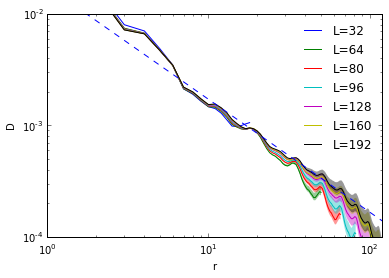

In [8]:
filling = 0.875
corr_type = utils.Averaged()
bond_dim = utils.Extrapolation('variance', deg=2, num_points=6)

system_sizes = []
system_sizes.append(32)
system_sizes.append(64)
system_sizes.append(80)
system_sizes.append(96)
system_sizes.append(128)
system_sizes.append(160)
system_sizes.append(192)

figure()
## Plot correlations
for L in system_sizes:
    d, props = load_many_extrap('pairfield', L=L, filling=filling, correlation_type=corr_type)
    line, = plot(d[:,0], d[:,1], label='L='+str(L))
    fill_between(d[:,0], d[:,2], d[:,3], edgecolor='none', facecolor=line.get_color(), alpha=.4)


## Reference decay
class power_law:
    def __init__(self, p, exponent):
        self.exponent = float(exponent)
        self.factor   = p[1] * p[0]**(-self.exponent)
    
    def __call__(self, x):
        return self.factor * x**self.exponent

xdecay = np.linspace(1,200)
p_i=11
p = [p_i, abs(d[p_i-1,1])]

Krho = load.krho(filling=filling, bond_dim=bond_dim)
ydecay = power_law(p, -1./Krho)(xdecay)
plot(xdecay, ydecay, '--')

## Plot settings
xlim(1, 120)
ylim(1e-4, 1e-2)
legend(loc='best', frameon=False)
xscale('log')
yscale('log')
xlabel('r')
ylabel('D')

## FIT `fit_func` ##
# L      : 32.0
# fill   : 0.9375
# nholes : 2.0
K_rho : -2.08170085832
-- n0 : 1.83780901122
-- A : 0.0027475917492
-- alpha : -1.04085042916
PROBLEM: Failed to fit.
## FIT `fit_func` ##
# L      : 48.0
# fill   : 0.916666666667
# nholes : 3.0
K_rho : 1.0
-- n0 : 0.0625
-- A : 1.0
-- alpha : 0.5
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.9375
# nholes : 4.0
K_rho : 0.912082192172
-- n0 : 1.86374913068
-- A : 0.164566388677
-- alpha : 0.456041096086
# Discard L=80, n=0.925, tperp=1.0, M=1200 : middle density not symmetry, delta=5.68333242994e-05
## FIT `fit_func` ##
# L      : 80.0
# fill   : 0.925
# nholes : 5.0
K_rho : -0.967370044769
-- n0 : 1.86425467484
-- A : -0.00420962751086
-- alpha : -0.483685022384
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.9375
# nholes : 6.0
K_rho : 1.16139334559
-- n0 : 1.86485797742
-- A : 0.249032501243
-- alpha : 0.580696672796
# Discard L=128, n=0.9375, tperp=1.0, M=1200 : middle density not symmetry, delta=0.0001982

scripts/density.py:139: RuntimeWarning: invalid value encountered in sqrt
  return A * np.cos(2*np.pi*kk*x + shift) / ((2*L_eff/np.pi) * np.sin(np.pi*x/L_eff + shift2))**alpha + n0


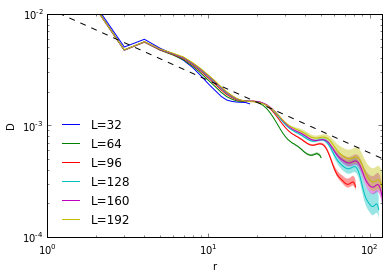

In [9]:
filling = 0.9375
corr_type = utils.Averaged()
bond_dim = utils.Extrapolation('variance', deg=2, num_points=6)

system_sizes = []
system_sizes.append(32)
system_sizes.append(64)
system_sizes.append(96)
system_sizes.append(128)
system_sizes.append(160)
system_sizes.append(192)

figure()
## Plot correlations
for L in system_sizes:
    d, props = load_many_extrap('pairfield', L=L, filling=filling, correlation_type=corr_type)
    line, = plot(d[:,0], d[:,1], label='L='+str(L))
    fill_between(d[:,0], d[:,2], d[:,3], edgecolor='none', facecolor=line.get_color(), alpha=.4)

## Reference decay
class power_law:
    def __init__(self, p, exponent):
        self.exponent = float(exponent)
        self.factor   = p[1] * p[0]**(-self.exponent)
    
    def __call__(self, x):
        return self.factor * x**self.exponent

xdecay = np.linspace(1,200)
p_i=20
p = [p_i, abs(d[p_i-1,1])]

Krho = load.krho(filling=filling, bond_dim=bond_dim)
ydecay = power_law(p, -1./Krho)(xdecay)
plot(xdecay, ydecay, '--')

## Plot settings
xlim(1, 120)
ylim(1e-4, 1e-2)
legend(loc='best', frameon=False)
xscale('log')
yscale('log')
xlabel('r')
ylabel('D')

## FIT `fit_func` ##
# L      : 32.0
# fill   : 0.9375
# nholes : 1.0
K_rho : -0.339231338363
-- n0 : 1.93571883609
-- A : -0.0424571366725
-- alpha : -0.169615669182
Data not found for L=48, n=0.96875, M=extrap_variance_deg2_num6
## FIT `fit_func` ##
# L      : 64.0
# fill   : 0.96875
# nholes : 2.0
K_rho : -2.95624808044
-- n0 : 1.91501669897
-- A : 0.000138029466492
-- alpha : -1.47812404022
Data not found for L=80, n=0.96875, M=extrap_variance_deg2_num6
PROBLEM: Failed to fit.
## FIT `fit_func` ##
# L      : 96.0
# fill   : 0.958333333333
# nholes : 3.0
K_rho : 1.0
-- n0 : 0.03125
-- A : 1.0
-- alpha : 0.5
# Discard L=128, n=0.96875, tperp=1.0, M=1200 : middle density not symmetry, delta=0.00129310249938
# Discard L=128, n=0.96875, tperp=1.0, M=1600 : middle density not symmetry, delta=0.000144364999007
# Discard L=128, n=0.96875, tperp=1.0, M=2000 : middle density not symmetry, delta=0.000576815380084
## FIT `fit_func` ##
# L      : 128.0
# fill   : 0.96875
# nholes : 4.0
K_rho : 

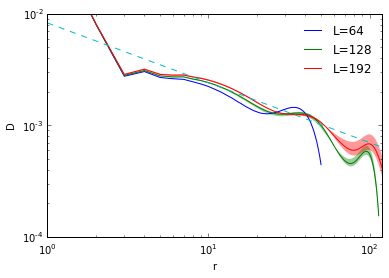

In [10]:
filling = 0.96875
corr_type = utils.Averaged()

system_sizes = []
system_sizes.append(64)
system_sizes.append(128)
system_sizes.append(192)

figure()
## Plot correlations
for L in system_sizes:
    d, props = load_many_extrap('pairfield', L=L, filling=filling, correlation_type=corr_type)
    line, = plot(d[:,0], d[:,1], label='L='+str(L))
    fill_between(d[:,0], d[:,2], d[:,3], edgecolor='none', facecolor=line.get_color(), alpha=.4)

## Reference decay
class power_law:
    def __init__(self, p, exponent):
        self.exponent = float(exponent)
        self.factor   = p[1] * p[0]**(-self.exponent)
    
    def __call__(self, x):
        return self.factor * x**self.exponent

xdecay = np.linspace(1,200)
p_i=8
p = [p_i, abs(d[p_i-1,1])]

Krho = load.krho(filling=filling, bond_dim=bond_dim, amplitude_points=2)
ydecay = power_law(p, -1./Krho)(xdecay)
plot(xdecay, ydecay, '--')

## Plot settings
xlim(1, 120)
ylim(1e-4, 1e-2)
legend(loc='best', frameon=False)
xscale('log')
yscale('log')
xlabel('r')
ylabel('D')